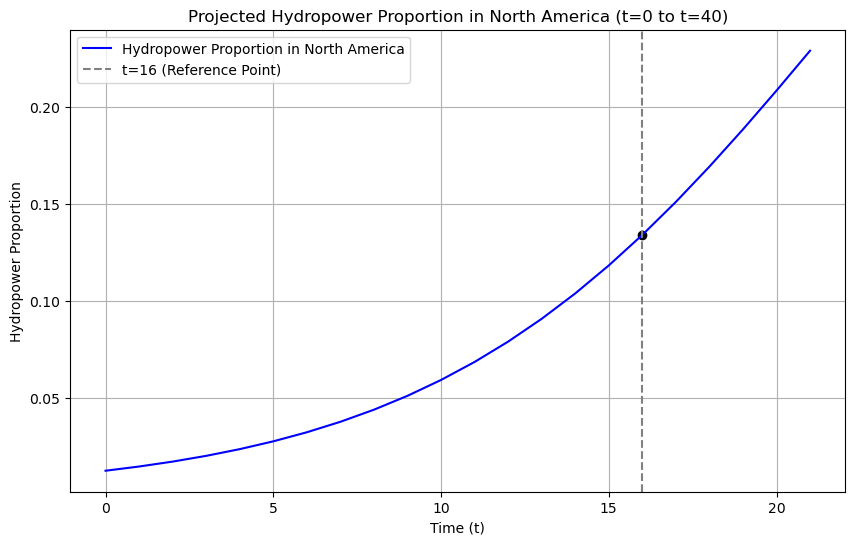

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic function
L = 1.0  # Saturation level for the logistic function
k = 0.16746558  # Growth rate from the North America logistic model
t_inflection = 22  # Inflection point from the North America model

# Define the time period
t = np.arange(0, 22)  # From t=0 to t=40

# Logistic function for renewable energy proportion in North America
psi_NA = L / (1 + np.exp(-k * (t - t_inflection)))

# Initialize hydropower proportion array
hydropower_proportion_NA = np.zeros_like(t, dtype=float)
hydropower_proportion_NA[16] = 0.134  # Set the known value at t=16

# Calculate hydropower proportion for each time step from t=17 to t=40 (forward recursion)
for time in range(17, len(t)):
    hydropower_proportion_NA[time] = hydropower_proportion_NA[time - 1] * (psi_NA[time] / psi_NA[time - 1])

# Calculate hydropower proportion for each time step from t=15 down to t=0 (reverse recursion)
for time in range(15, -1, -1):
    hydropower_proportion_NA[time] = hydropower_proportion_NA[time + 1] / (psi_NA[time + 1] / psi_NA[time])

# Plotting the hydropower proportion for North America
plt.figure(figsize=(10, 6))
plt.plot(t, hydropower_proportion_NA, label='Hydropower Proportion in North America', color='blue')
plt.axvline(16, linestyle='--', color='gray', label='t=16 (Reference Point)')
plt.scatter(16, 0.134, color='black')  # Mark the known data point

# Add labels and title
plt.xlabel('Time (t)')
plt.ylabel('Hydropower Proportion')
plt.title('Projected Hydropower Proportion in North America (t=0 to t=40)')
plt.legend()
plt.grid(True)
plt.show()


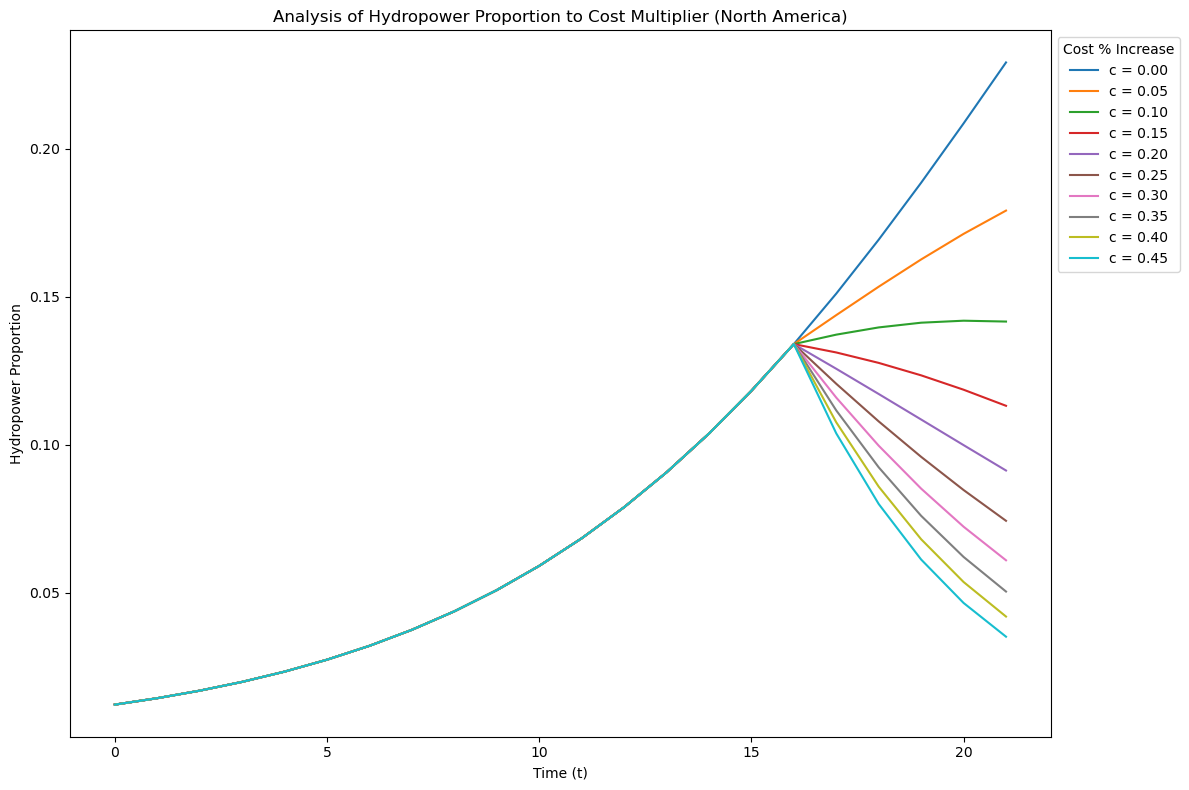

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic function
L = 1.0  # Saturation level for the logistic function
k = 0.16746558  # Growth rate from the North America logistic model
t_inflection = 22  # Inflection point from the North America model

# Define the time period
t = np.arange(0, 22)  # From t=0 to t=21

# Logistic function for renewable energy proportion in North America
psi_NA = L / (1 + np.exp(-k * (t - t_inflection)))

# Define a range of cost multiplier values (c) for sensitivity analysis
c_values = np.linspace(0, 0.5, 100)

# Prepare storage for sensitivity results
sensitivity_results = []

# Perform sensitivity analysis for each c value
for c in c_values:
    cost_multiplier = 1 / (1 + c)
    hydropower_proportion = np.zeros_like(t, dtype=float)
    hydropower_proportion[16] = 0.134  # Known value at t=16

    # Forward recursion (t=17 to t=21)
    for time in range(17, len(t)):
        hydropower_proportion[time] = (
            hydropower_proportion[time - 1]
            * (psi_NA[time] / psi_NA[time - 1])
            * cost_multiplier
        )

    # Reverse recursion (t=15 to t=0)
    for time in range(15, -1, -1):
        hydropower_proportion[time] = (
            hydropower_proportion[time + 1]
            / (psi_NA[time + 1] / psi_NA[time])
        )

    # Save the result for this value of c
    sensitivity_results.append(hydropower_proportion)

# Convert results into a numpy array for easier plotting
sensitivity_results = np.array(sensitivity_results)

# Plot sensitivity analysis
plt.figure(figsize=(12, 8))
for i, c in enumerate(c_values[::10]):  # Plot every 10th c value for clarity
    plt.plot(
        t, sensitivity_results[i * 10], label=f"c = {c:.2f}"
    )

# Add labels, title, and legend
plt.xlabel('Time (t)')
plt.ylabel('Hydropower Proportion')
plt.title('Analysis of Hydropower Proportion to Cost Multiplier (North America)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Cost % Increase")

plt.tight_layout()
plt.savefig("hydro_cost.png")
plt.show()


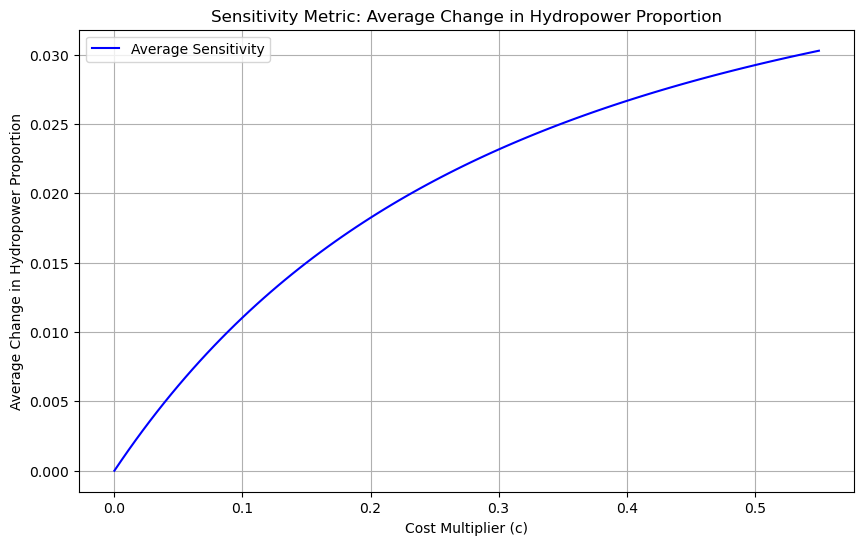

In [17]:
# Calculate baseline hydropower proportion for c=0
baseline_proportion = sensitivity_results[0]  # First result corresponds to c=0

# Initialize metric storage
average_sensitivity = []

# Compute the metric for each c
for proportions in sensitivity_results:
    delta_p = baseline_proportion - proportions
    avg_delta_p = np.mean(delta_p)  # Average change over time
    average_sensitivity.append(avg_delta_p)

# Plot the sensitivity metric
plt.figure(figsize=(10, 6))
plt.plot(c_values, average_sensitivity, color='blue', label='Average Sensitivity')
plt.xlabel('Cost Multiplier (c)')
plt.ylabel('Average Change in Hydropower Proportion')
plt.title('Sensitivity Metric: Average Change in Hydropower Proportion')
plt.grid(True)
plt.legend()
plt.show()


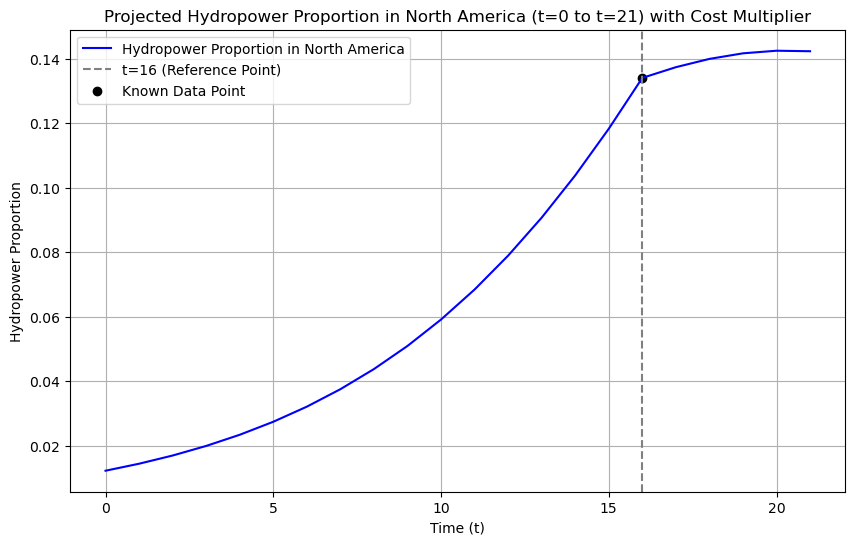

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic function
L = 1.0  # Saturation level for the logistic function
k = 0.16746558  # Growth rate from the North America logistic model
t_inflection = 22  # Inflection point from the North America model

# Define the time period
t = np.arange(0, 22)  # From t=0 to t=21

# Logistic function for renewable energy proportion in North America
psi_NA = L / (1 + np.exp(-k * (t - t_inflection)))

# Initialize hydropower proportion array
hydropower_proportion_NA = np.zeros_like(t, dtype=float)
hydropower_proportion_NA[16] = 0.134  # Set the known value at t=16

# Define cost multiplier for times after t=16
c = 0.1
cost_multiplier = 1 / (1 + c)

# Calculate hydropower proportion for each time step from t=17 to t=21 (forward recursion)
for time in range(17, len(t)):
    hydropower_proportion_NA[time] = (
        hydropower_proportion_NA[time - 1] 
        * (psi_NA[time] / psi_NA[time - 1]) 
        * cost_multiplier
    )

# Calculate hydropower proportion for each time step from t=15 down to t=0 (reverse recursion)
for time in range(15, -1, -1):
    hydropower_proportion_NA[time] = (
        hydropower_proportion_NA[time + 1] 
        / (psi_NA[time + 1] / psi_NA[time])
    )

# Plotting the hydropower proportion for North America
plt.figure(figsize=(10, 6))
plt.plot(t, hydropower_proportion_NA, label='Hydropower Proportion in North America', color='blue')
plt.axvline(16, linestyle='--', color='gray', label='t=16 (Reference Point)')
plt.scatter(16, 0.134, color='black', label='Known Data Point')  # Mark the known data point

# Add labels and title
plt.xlabel('Time (t)')
plt.ylabel('Hydropower Proportion')
plt.title('Projected Hydropower Proportion in North America (t=0 to t=21) with Cost Multiplier')
plt.legend()
plt.grid(True)
plt.show()


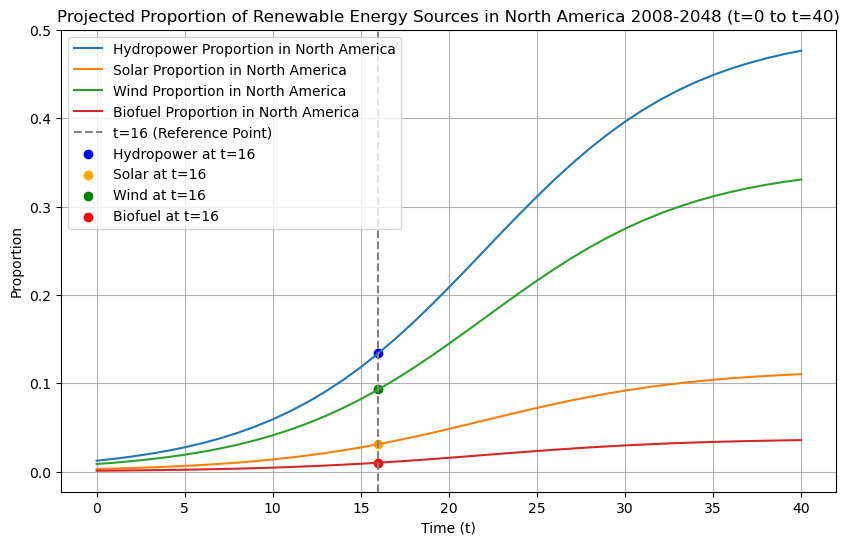

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic function
L = 1.0  # Saturation level for the logistic function
k = 0.16746558  # Growth rate from the North America logistic model
t_inflection = 22  # Inflection point from the North America model

# Define the time period
t = np.arange(0, 41)  # From t=0 to t=40

# Logistic function for renewable energy proportion in North America
psi_NA = L / (1 + np.exp(-k * (t - t_inflection)))

# Initial proportions for each renewable at t=16
initial_proportions = {
    "Hydropower": 0.134,
    "Solar": 0.031,
    "Wind": 0.093,
    "Biofuel": 0.01
}

# Dictionary to store each renewable's proportion over time
renewable_proportions = {}

# Calculate the proportion over time for each renewable source
for source, initial_value in initial_proportions.items():
    # Initialize the proportion array for this renewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        proportions[time] = proportions[time - 1] * (psi_NA[time] / psi_NA[time - 1])

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        proportions[time] = proportions[time + 1] / (psi_NA[time + 1] / psi_NA[time])

    # Store the calculated proportions in the dictionary
    renewable_proportions[source] = proportions

# Plotting the renewable proportions for each source in North America
plt.figure(figsize=(10, 6))

for source, proportions in renewable_proportions.items():
    plt.plot(t, proportions, label=f'{source} Proportion in North America')

# Mark the known data points at t=16
plt.axvline(16, linestyle='--', color='gray', label='t=16 (Reference Point)')
plt.scatter(16, initial_proportions["Hydropower"], color='blue', label='Hydropower at t=16')
plt.scatter(16, initial_proportions["Solar"], color='orange', label='Solar at t=16')
plt.scatter(16, initial_proportions["Wind"], color='green', label='Wind at t=16')
plt.scatter(16, initial_proportions["Biofuel"], color='red', label='Biofuel at t=16')

# Add labels, title, and legend
plt.xlabel('Time (t)')
plt.ylabel('Proportion')
plt.title('Projected Proportion of Renewable Energy Sources in North America 2008-2048 (t=0 to t=40)')
plt.legend()
plt.grid(True)
plt.savefig("RenewableLogistic.png")
plt.show()



In [5]:
# Calculate and print the sum of all renewable sources for each time step
print("Sum of all renewable sources for each time step (t=0 to t=40):")
for time in range(len(t)):
    total_proportion = sum(renewable_proportions[source][time] for source in renewable_proportions)
    print(f"t={time}: Total Renewable Proportion = {total_proportion:.4f}")

Sum of all renewable sources for each time step (t=0 to t=40):
t=0: Total Renewable Proportion = 0.0245
t=1: Total Renewable Proportion = 0.0288
t=2: Total Renewable Proportion = 0.0339
t=3: Total Renewable Proportion = 0.0399
t=4: Total Renewable Proportion = 0.0468
t=5: Total Renewable Proportion = 0.0548
t=6: Total Renewable Proportion = 0.0642
t=7: Total Renewable Proportion = 0.0750
t=8: Total Renewable Proportion = 0.0875
t=9: Total Renewable Proportion = 0.1018
t=10: Total Renewable Proportion = 0.1182
t=11: Total Renewable Proportion = 0.1368
t=12: Total Renewable Proportion = 0.1578
t=13: Total Renewable Proportion = 0.1814
t=14: Total Renewable Proportion = 0.2076
t=15: Total Renewable Proportion = 0.2364
t=16: Total Renewable Proportion = 0.2680
t=17: Total Renewable Proportion = 0.3021
t=18: Total Renewable Proportion = 0.3385
t=19: Total Renewable Proportion = 0.3770
t=20: Total Renewable Proportion = 0.4170
t=21: Total Renewable Proportion = 0.4582
t=22: Total Renewable P

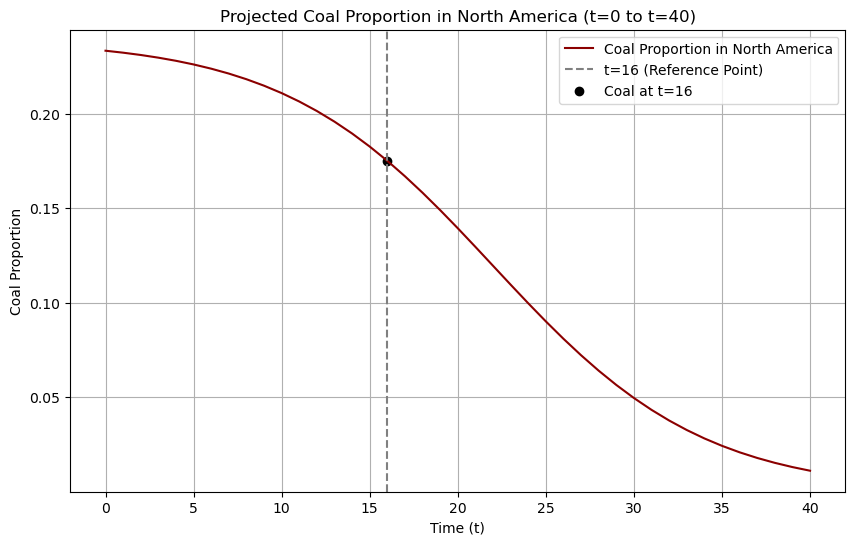

In [6]:
# Initialize coal proportion array
coal_proportion = np.zeros_like(t, dtype=float)
coal_proportion[16] = 0.175  # Set the known value at t=16

# Calculate coal proportion using the provided recursive formula
for time in range(17, len(t)):
    renewable_sum = sum(renewable_proportions[source][time] for source in renewable_proportions)
    renewable_sum_prev = sum(renewable_proportions[source][time - 1] for source in renewable_proportions)
    
    nonrenewable_sum_prev = 1 - renewable_sum_prev  # Total nonrenewable at t-1 (assuming all proportions add up to 1)

    # Apply the recursive formula
    coal_proportion[time] = (1 - renewable_sum) / nonrenewable_sum_prev * coal_proportion[time - 1]

# Calculate coal proportion for each time step from t=15 down to t=0 (reverse recursion)
for time in range(15, -1, -1):
    renewable_sum = sum(renewable_proportions[source][time] for source in renewable_proportions)
    renewable_sum_next = sum(renewable_proportions[source][time + 1] for source in renewable_proportions)
    
    nonrenewable_sum = 1 - renewable_sum  # Total nonrenewable at t+1 (assuming all proportions add up to 1)

    # Apply the reverse recursive formula
    coal_proportion[time] = nonrenewable_sum / (1 - renewable_sum_next) * coal_proportion[time + 1]

# Plotting the coal proportion over time
plt.figure(figsize=(10, 6))
plt.plot(t, coal_proportion, label='Coal Proportion in North America', color='darkred')
plt.axvline(16, linestyle='--', color='gray', label='t=16 (Reference Point)')
plt.scatter(16, 0.175, color='black', label='Coal at t=16')  # Mark the known data point

# Add labels and title
plt.xlabel('Time (t)')
plt.ylabel('Coal Proportion')
plt.title('Projected Coal Proportion in North America (t=0 to t=40)')
plt.legend()
plt.grid(True)
plt.show()

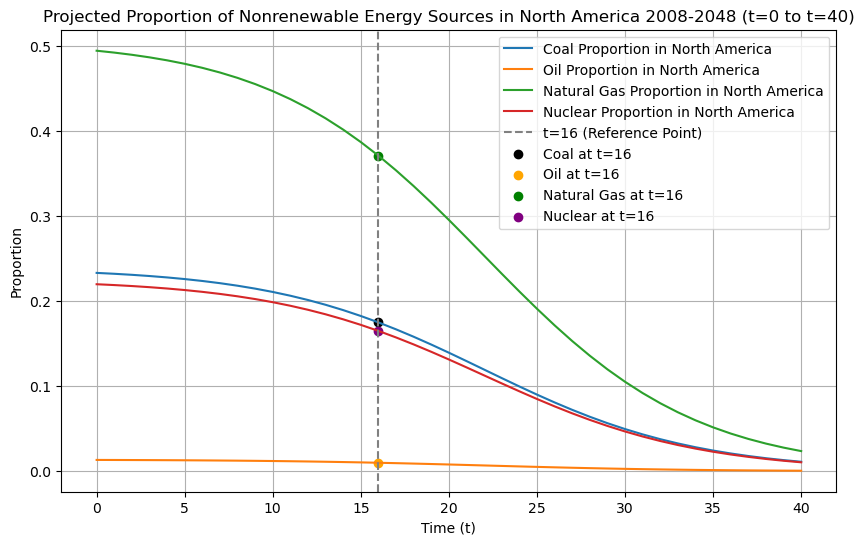

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic function (for renewable sources)
L = 1.0  # Saturation level for the logistic function
k = 0.16746558  # Growth rate from the North America logistic model
t_inflection = 22  # Inflection point from the North America model

# Define the time period
t = np.arange(0, 41)  # From t=0 to t=40

# Logistic function for renewable energy proportion in North America
psi_NA = L / (1 + np.exp(-k * (t - t_inflection)))

# Initial proportions for each renewable at t=16
initial_proportions_renewable = {
    "Hydropower": 0.134,
    "Solar": 0.031,
    "Wind": 0.093,
    "Biofuel": 0.01
}

# Dictionary to store each renewable's proportion over time
renewable_proportions = {}

# Calculate the proportion over time for each renewable source
for source, initial_value in initial_proportions_renewable.items():
    # Initialize the proportion array for this renewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        proportions[time] = proportions[time - 1] * (psi_NA[time] / psi_NA[time - 1])

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        proportions[time] = proportions[time + 1] / (psi_NA[time + 1] / psi_NA[time])

    # Store the calculated proportions in the dictionary
    renewable_proportions[source] = proportions

# Initial proportions for each nonrenewable at t=16
initial_proportions_nonrenewable = {
    "Coal": 0.175,
    "Oil": 0.01,
    "Natural Gas": 0.371,
    "Nuclear": 0.165
}

# Dictionary to store each nonrenewable's proportion over time
nonrenewable_proportions = {}

# Calculate the proportion over time for each nonrenewable source
for source, initial_value in initial_proportions_nonrenewable.items():
    # Initialize the proportion array for this nonrenewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        renewable_sum = sum(renewable_proportions[renewable][time] for renewable in renewable_proportions)
        renewable_sum_prev = sum(renewable_proportions[renewable][time - 1] for renewable in renewable_proportions)
        
        nonrenewable_sum_prev = 1 - renewable_sum_prev  # Total nonrenewable at t-1

        # Apply the recursive formula
        proportions[time] = (1 - renewable_sum) / nonrenewable_sum_prev * proportions[time - 1]

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        renewable_sum = sum(renewable_proportions[renewable][time] for renewable in renewable_proportions)
        renewable_sum_next = sum(renewable_proportions[renewable][time + 1] for renewable in renewable_proportions)
        
        nonrenewable_sum = 1 - renewable_sum  # Total nonrenewable at t+1

        # Apply the reverse recursive formula
        proportions[time] = nonrenewable_sum / (1 - renewable_sum_next) * proportions[time + 1]

    # Store the calculated proportions in the dictionary
    nonrenewable_proportions[source] = proportions

# Plotting the nonrenewable proportions for each source in North America
plt.figure(figsize=(10, 6))

for source, proportions in nonrenewable_proportions.items():
    plt.plot(t, proportions, label=f'{source} Proportion in North America')

# Mark the known data points at t=16
plt.axvline(16, linestyle='--', color='gray', label='t=16 (Reference Point)')
plt.scatter(16, initial_proportions_nonrenewable["Coal"], color='black', label='Coal at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Oil"], color='orange', label='Oil at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Natural Gas"], color='green', label='Natural Gas at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Nuclear"], color='purple', label='Nuclear at t=16')

# Add labels, title, and legend
plt.xlabel('Time (t)')
plt.ylabel('Proportion')
plt.title('Projected Proportion of Nonrenewable Energy Sources in North America 2008-2048 (t=0 to t=40)')
plt.legend()
plt.grid(True)
plt.savefig("NonrenewableLogistic.png")
plt.show()


In [8]:
# Calculate and print the sum of all energy source proportions for each time step
print("Sum of all energy source proportions for each time step (t=0 to t=40):")
for time in range(len(t)):
    # Sum of all renewable energy sources at this time step
    total_renewable = sum(renewable_proportions[source][time] for source in renewable_proportions)
    
    # Sum of all nonrenewable energy sources at this time step
    total_nonrenewable = sum(nonrenewable_proportions[source][time] for source in nonrenewable_proportions)
    
    # Total sum of all energy sources
    total_proportion = total_renewable + total_nonrenewable
    
    # Print the result for this time step
    print(f"t={time}: Total Proportion = {total_proportion:.4f}")


Sum of all energy source proportions for each time step (t=0 to t=40):
t=0: Total Proportion = 0.9853
t=1: Total Proportion = 0.9854
t=2: Total Proportion = 0.9855
t=3: Total Proportion = 0.9856
t=4: Total Proportion = 0.9857
t=5: Total Proportion = 0.9858
t=6: Total Proportion = 0.9859
t=7: Total Proportion = 0.9861
t=8: Total Proportion = 0.9863
t=9: Total Proportion = 0.9865
t=10: Total Proportion = 0.9867
t=11: Total Proportion = 0.9870
t=12: Total Proportion = 0.9873
t=13: Total Proportion = 0.9877
t=14: Total Proportion = 0.9881
t=15: Total Proportion = 0.9885
t=16: Total Proportion = 0.9890
t=17: Total Proportion = 0.9895
t=18: Total Proportion = 0.9901
t=19: Total Proportion = 0.9906
t=20: Total Proportion = 0.9912
t=21: Total Proportion = 0.9919
t=22: Total Proportion = 0.9925
t=23: Total Proportion = 0.9931
t=24: Total Proportion = 0.9937
t=25: Total Proportion = 0.9943
t=26: Total Proportion = 0.9949
t=27: Total Proportion = 0.9955
t=28: Total Proportion = 0.9960
t=29: Total

In [29]:

renewable_proportions

{'Hydropower': array([0.01225041, 0.01441931, 0.01695886, 0.01992732, 0.02339021,
        0.0274205 , 0.03209848, 0.03751117, 0.04375124, 0.05091509,
        0.05910001, 0.06840029, 0.07890221, 0.09067778, 0.10377767,
        0.11822344, 0.134     , 0.15104892, 0.16926383, 0.18848879,
        0.20852063, 0.22911558, 0.24999999, 0.2708844 , 0.29147935,
        0.31151119, 0.33073615, 0.34895106, 0.36599998, 0.38177654,
        0.39622231, 0.4093222 , 0.42109777, 0.43159969, 0.44089997,
        0.44908489, 0.45624874, 0.46248881, 0.46790151, 0.47257948,
        0.47660977]),
 'Solar': array([0.00283405, 0.00333581, 0.00392332, 0.00461005, 0.00541117,
        0.00634355, 0.00742577, 0.00867796, 0.01012156, 0.01177886,
        0.01367239, 0.01582395, 0.0182535 , 0.0209777 , 0.02400827,
        0.0273502 , 0.031     , 0.03494415, 0.03915805, 0.04360562,
        0.04823985, 0.05300435, 0.05783582, 0.06266729, 0.06743179,
        0.07206602, 0.07651359, 0.08072748, 0.08467164, 0.08832144,
   

In [31]:
nonrenewable_proportions

{'Coal': array([0.2332136 , 0.23217656, 0.2309623 , 0.22954295, 0.22788719,
        0.22596014, 0.22372341, 0.22113537, 0.21815173, 0.21472639,
        0.21081284, 0.20636598, 0.20134457, 0.19571417, 0.18945057,
        0.18254344, 0.175     , 0.16684819, 0.15813888, 0.14894662,
        0.13936855, 0.12952124, 0.11953552, 0.10954981, 0.0997025 ,
        0.09012443, 0.08093217, 0.07222285, 0.06407105, 0.05652761,
        0.04962048, 0.04335687, 0.03772648, 0.03270507, 0.02825821,
        0.02434466, 0.02091932, 0.01793568, 0.01534764, 0.01311091,
        0.01118385]),
 'Oil': array([0.01332649, 0.01326723, 0.01319785, 0.01311674, 0.01302213,
        0.01291201, 0.01278419, 0.01263631, 0.01246581, 0.01227008,
        0.01204645, 0.01179234, 0.0115054 , 0.01118367, 0.01082575,
        0.01043105, 0.01      , 0.00953418, 0.00903651, 0.00851124,
        0.00796392, 0.00740121, 0.0068306 , 0.00625999, 0.00569729,
        0.00514997, 0.0046247 , 0.00412702, 0.0036612 , 0.00323015,
        0.0

In [ ]:
#carbon emissions


NameError: name 'data_by_continent' is not defined